In [1]:
# Python _keras

#sudo pip install keras

# 2.2.4

#The Sequential model is a linear stack of layers.

#You can create a Sequential model by passing a list of layer instances to the constructor:

In [3]:
from keras.models import Sequential
from keras.layers import Dense, Activation

model = Sequential([
    Dense(32, input_shape=(784,)),
    Activation('relu'),
    Dense(10),
    Activation('softmax'),
])

Using TensorFlow backend.


In [4]:
# model = Sequential()
# model.add(Dense(32, input_dim=784))
# model.add(Activation('relu'))

Specifying the input shape
The model needs to know what input shape it should expect. For this reason, the first layer in a Sequential model (and only the first, because following layers can do automatic shape inference) needs to receive information about its input shape. There are several possible ways to do this:

Pass an input_shape argument to the first layer. This is a shape tuple (a tuple of integers or None entries, where None indicates that any positive integer may be expected). In input_shape, the batch dimension is not included.
Some 2D layers, such as Dense, support the specification of their input shape via the argument input_dim, and some 3D temporal layers support the arguments input_dim and input_length.
If you ever need to specify a fixed batch size for your inputs (this is useful for stateful recurrent networks), you can pass a batch_size argument to a layer. If you pass both batch_size=32 and input_shape=(6, 8) to a layer, it will then expect every batch of inputs to have the batch shape (32, 6, 8).

Compilation
Before training a model, you need to configure the learning process, which is done via the compile method. It receives three arguments:

An optimizer. This could be the string identifier of an existing optimizer (such as rmsprop or adagrad), or an instance of the Optimizer class. See: optimizers.
A loss function. This is the objective that the model will try to minimize. It can be the string identifier of an existing loss function (such as categorical_crossentropy or mse), or it can be an objective function. See: losses.
A list of metrics. For any classification problem you will want to set this to metrics=['accuracy']. A metric could be the string identifier of an existing metric or a custom metric function.

In [5]:
# For a multi-class classification problem
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# For a binary classification problem
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# For a mean squared error regression problem
model.compile(optimizer='rmsprop',
              loss='mse')

Keras models are trained on Numpy arrays of input data and labels. For training a model, you will typically use the fit function

In [6]:
# TRAINING
# For a single-input model with 2 classes (binary classification):

model = Sequential()
model.add(Dense(32, activation='relu', input_dim=100))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Generate dummy data
import numpy as np
data = np.random.random((1000, 100))
labels = np.random.randint(2, size=(1000, 1))

# Train the model, iterating on the data in batches of 32 samples
model.fit(data, labels, epochs=10, batch_size=32)

Epoch 1/10
1000/1000 [==============================] - 2s 2ms/step - loss: 0.7107 - acc: 0.5000
Epoch 2/10
1000/1000 [==============================] - 0s 33us/step - loss: 0.6928 - acc: 0.5430
Epoch 3/10
1000/1000 [==============================] - 0s 24us/step - loss: 0.6843 - acc: 0.5500
Epoch 4/10
1000/1000 [==============================] - 0s 42us/step - loss: 0.6798 - acc: 0.5790
Epoch 5/10
1000/1000 [==============================] - 0s 33us/step - loss: 0.6745 - acc: 0.5560
Epoch 6/10
1000/1000 [==============================] - 0s 38us/step - loss: 0.6693 - acc: 0.5930
Epoch 7/10
1000/1000 [==============================] - 0s 28us/step - loss: 0.6648 - acc: 0.5990
Epoch 8/10
1000/1000 [==============================] - 0s 44us/step - loss: 0.6590 - acc: 0.6070
Epoch 9/10
1000/1000 [==============================] - 0s 31us/step - loss: 0.6582 - acc: 0.6000
Epoch 10/10
1000/1000 [==============================] - 0s 46us/step - loss: 0.6481 - acc: 0.6150


In [8]:
# For a single-input model with 10 classes (categorical classification):
import keras
model = Sequential()
model.add(Dense(32, activation='relu', input_dim=100))
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Generate dummy data
import numpy as np
data = np.random.random((1000, 100))
labels = np.random.randint(10, size=(1000, 1))

# Convert labels to categorical one-hot encoding
one_hot_labels = keras.utils.to_categorical(labels, num_classes=10)

# Train the model, iterating on the data in batches of 32 samples
model.fit(data, one_hot_labels, epochs=10, batch_size=32)

Epoch 1/10
1000/1000 [==============================] - 1s 1ms/step - loss: 2.3330 - acc: 0.1090
Epoch 2/10
1000/1000 [==============================] - 0s 42us/step - loss: 2.3041 - acc: 0.1120
Epoch 3/10
1000/1000 [==============================] - 0s 41us/step - loss: 2.2948 - acc: 0.1330
Epoch 4/10
1000/1000 [==============================] - 0s 29us/step - loss: 2.2837 - acc: 0.1400
Epoch 5/10
1000/1000 [==============================] - 0s 35us/step - loss: 2.2728 - acc: 0.1360
Epoch 6/10
1000/1000 [==============================] - 0s 48us/step - loss: 2.2632 - acc: 0.1540
Epoch 7/10
1000/1000 [==============================] - 0s 38us/step - loss: 2.2536 - acc: 0.1500
Epoch 8/10
1000/1000 [==============================] - 0s 32us/step - loss: 2.2445 - acc: 0.1820
Epoch 9/10
1000/1000 [==============================] - 0s 28us/step - loss: 2.2337 - acc: 0.1750
Epoch 10/10
1000/1000 [==============================] - 0s 50us/step - loss: 2.2255 - acc: 0.1890


In [9]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout

# Generate dummy data
x_train = np.random.random((1000, 20))
y_train = np.random.randint(2, size=(1000, 1))
x_test = np.random.random((100, 20))
y_test = np.random.randint(2, size=(100, 1))

model = Sequential()
model.add(Dense(64, input_dim=20, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

model.fit(x_train, y_train,
          epochs=20,
          batch_size=128)
score = model.evaluate(x_test, y_test, batch_size=128)

Epoch 1/20
1000/1000 [==============================] - 1s 591us/step - loss: 0.7093 - acc: 0.5370
Epoch 2/20
1000/1000 [==============================] - 0s 25us/step - loss: 0.7258 - acc: 0.4860
Epoch 3/20
1000/1000 [==============================] - 0s 16us/step - loss: 0.7111 - acc: 0.4970
Epoch 4/20
1000/1000 [==============================] - 0s 20us/step - loss: 0.7177 - acc: 0.4820
Epoch 5/20
1000/1000 [==============================] - 0s 20us/step - loss: 0.7059 - acc: 0.5110
Epoch 6/20
1000/1000 [==============================] - 0s 23us/step - loss: 0.7106 - acc: 0.4870
Epoch 7/20
1000/1000 [==============================] - 0s 26us/step - loss: 0.7010 - acc: 0.5180
Epoch 8/20
1000/1000 [==============================] - 0s 24us/step - loss: 0.7003 - acc: 0.5030
Epoch 9/20
1000/1000 [==============================] - 0s 20us/step - loss: 0.6953 - acc: 0.5140
Epoch 10/20
1000/1000 [==============================] - 0s 20us/step - loss: 0.6974 - acc: 0.5150
Epoch 11/20
1000/1

In [13]:
# https://www.kaggle.com/uciml/pima-indians-diabetes-database

In [12]:
# Create your first MLP in Keras
from keras.models import Sequential
from keras.layers import Dense
import numpy
# fix random seed for reproducibility
numpy.random.seed(7)
# load pima indians dataset
# pima-indians-diabetes.csv
dataset = numpy.loadtxt("c:/users/hp/downloads/diabetes.csv", delimiter=",", skiprows=1)
# split into input (X) and output (Y) variables
X = dataset[:,0:8]
Y = dataset[:,8]
# create model
model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# Fit the model
model.fit(X, Y, epochs=150, batch_size=10)
# evaluate the model
scores = model.evaluate(X, Y)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))



Epoch 1/150
768/768 [==============================] - 1s 840us/step - loss: 3.6823 - acc: 0.5977
Epoch 2/150
768/768 [==============================] - 0s 111us/step - loss: 0.9280 - acc: 0.6003
Epoch 3/150
768/768 [==============================] - 0s 86us/step - loss: 0.7406 - acc: 0.6354
Epoch 4/150
768/768 [==============================] - 0s 88us/step - loss: 0.7076 - acc: 0.6602
Epoch 5/150
768/768 [==============================] - 0s 107us/step - loss: 0.6803 - acc: 0.6758
Epoch 6/150
768/768 [==============================] - 0s 94us/step - loss: 0.6500 - acc: 0.6849
Epoch 7/150
768/768 [==============================] - 0s 96us/step - loss: 0.6488 - acc: 0.6732
Epoch 8/150
768/768 [==============================] - 0s 95us/step - loss: 0.6348 - acc: 0.6901
Epoch 9/150
768/768 [==============================] - 0s 95us/step - loss: 0.6232 - acc: 0.6914
Epoch 10/150
768/768 [==============================] - 0s 93us/step - loss: 0.6274 - acc: 0.6784
Epoch 11/150
768/768 [====

768/768 [==============================] - 0s 82us/step - loss: 0.4980 - acc: 0.7578
Epoch 85/150
768/768 [==============================] - 0s 90us/step - loss: 0.5071 - acc: 0.7474
Epoch 86/150
768/768 [==============================] - 0s 88us/step - loss: 0.5079 - acc: 0.7526
Epoch 87/150
768/768 [==============================] - 0s 88us/step - loss: 0.4999 - acc: 0.7604
Epoch 88/150
768/768 [==============================] - 0s 85us/step - loss: 0.5014 - acc: 0.7617
Epoch 89/150
768/768 [==============================] - 0s 82us/step - loss: 0.5034 - acc: 0.7682
Epoch 90/150
768/768 [==============================] - 0s 86us/step - loss: 0.5112 - acc: 0.7552
Epoch 91/150
768/768 [==============================] - 0s 85us/step - loss: 0.4989 - acc: 0.7565
Epoch 92/150
768/768 [==============================] - 0s 85us/step - loss: 0.5094 - acc: 0.7487
Epoch 93/150
768/768 [==============================] - 0s 87us/step - loss: 0.5011 - acc: 0.7682
Epoch 94/150
768/768 [===========

In [14]:
# UCI_Credit_Card.csv
# Credit Defaulting

In [17]:
# Import General Libraries 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# Loading Data
data = pd.read_csv('c:/users/hp/downloads/UCI_Credit_Card.csv')
# Inspecting Data; Preliminary Review 
data.info()
print('------------------------')
print(data.describe())
print('------------------------')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID                            30000 non-null int64
LIMIT_BAL                     30000 non-null float64
SEX                           30000 non-null int64
EDUCATION                     30000 non-null int64
MARRIAGE                      30000 non-null int64
AGE                           30000 non-null int64
PAY_0                         30000 non-null int64
PAY_2                         30000 non-null int64
PAY_3                         30000 non-null int64
PAY_4                         30000 non-null int64
PAY_5                         30000 non-null int64
PAY_6                         30000 non-null int64
BILL_AMT1                     30000 non-null float64
BILL_AMT2                     30000 non-null float64
BILL_AMT3                     30000 non-null float64
BILL_AMT4                     30000 non-null float64
BILL_AMT5                     30000 non-null float64
BILL_AMT6   

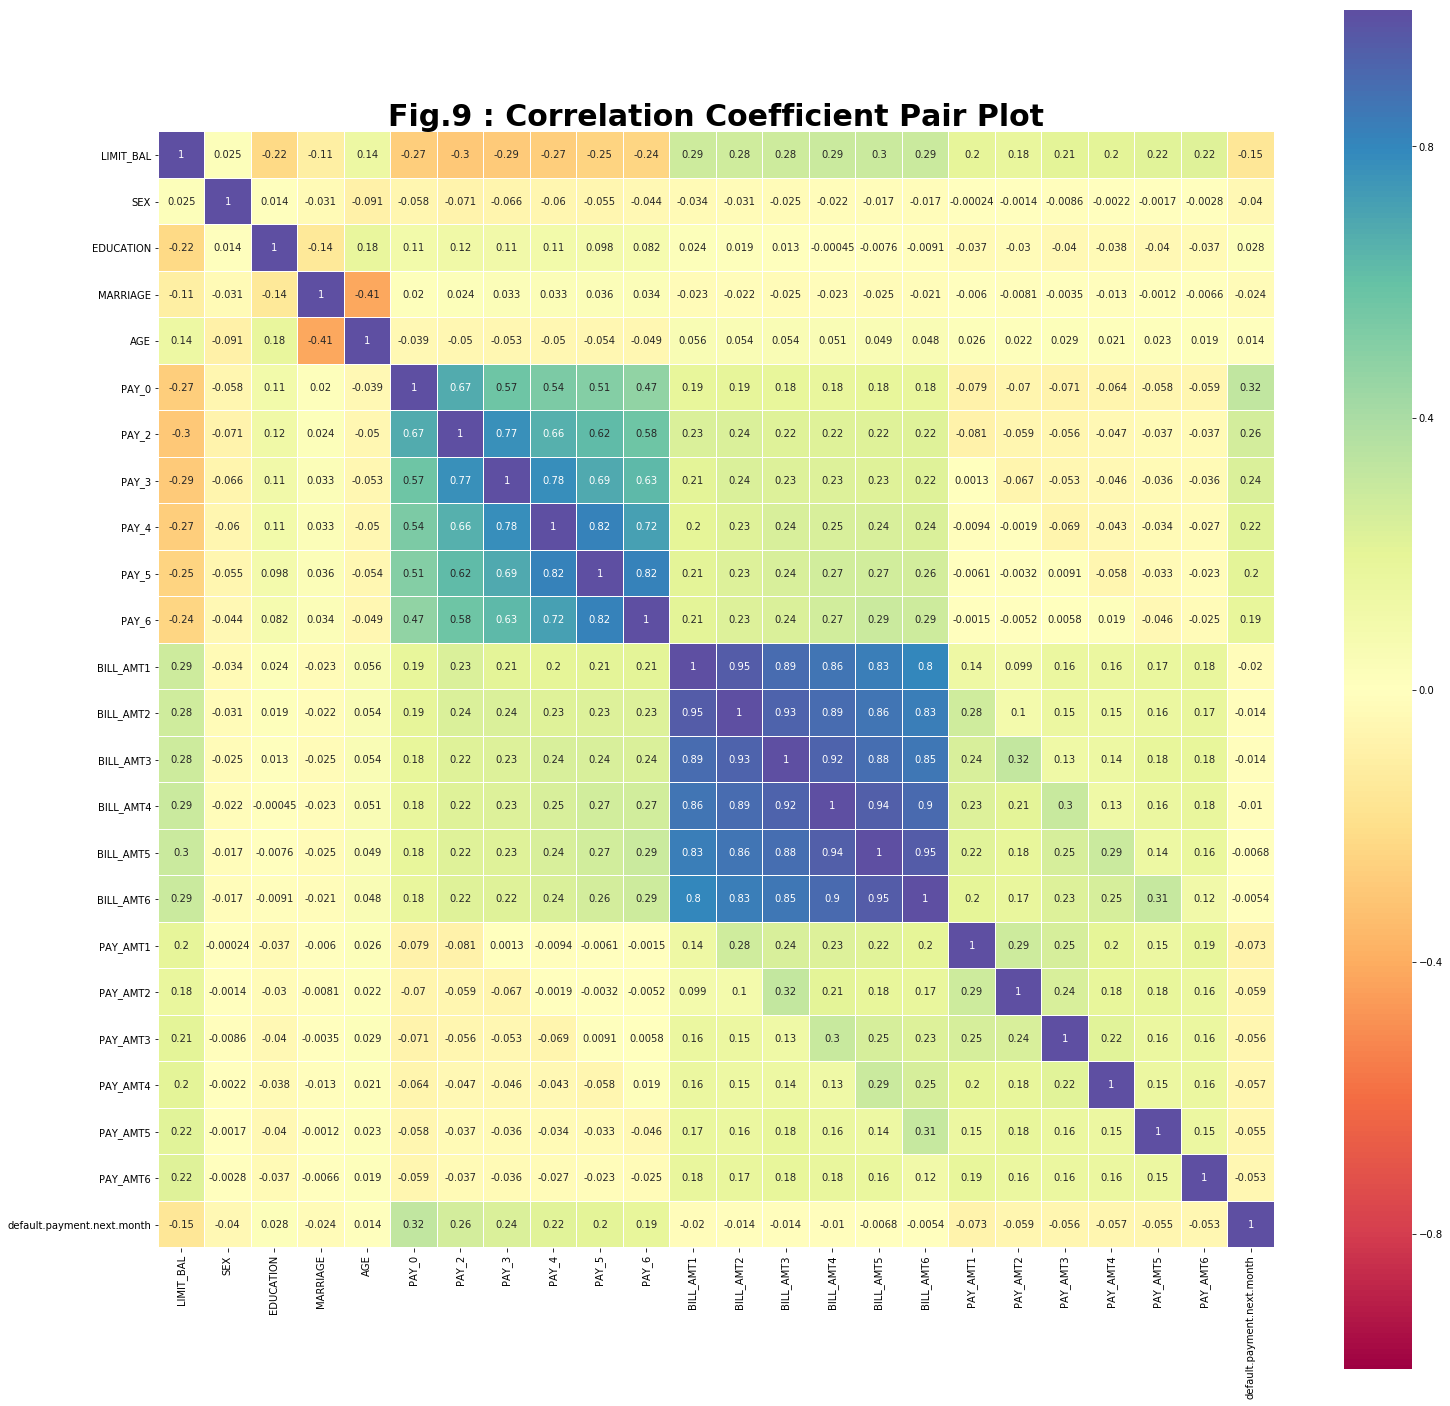

In [18]:
# Making correlation coefficients pair plot of all feature in order to identify degenrate features
plt.figure(figsize=(25,25))
ax = plt.axes()
corr = data.drop(['ID'], axis=1).corr()
sns.heatmap(corr, vmax=1,vmin=-1, square=True, annot=True, cmap='Spectral',linecolor="white", linewidths=0.01, ax=ax)
ax.set_title('Fig.9 : Correlation Coefficient Pair Plot',fontweight="bold", size=30)
plt.show()

In [19]:
from sklearn.preprocessing import StandardScaler
from keras.utils import to_categorical

predictors = data.drop(['ID','default.payment.next.month'], axis=1).as_matrix()
predictors = StandardScaler().fit_transform(predictors)

target = to_categorical(data['default.payment.next.month']) 

e:\python\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.


In [20]:
# Deep Learning Libraries
from keras.layers import Dense
from keras.models import Sequential
from keras.callbacks import EarlyStopping
from sklearn.utils import class_weight

In [21]:
# Calculating default Ratio
non_default = len(data[data['default.payment.next.month']==0])
default = len(data[data['default.payment.next.month']==1])
ratio = float(default/(non_default+default))
print('Default Ratio :',ratio)

Default Ratio : 0.2212


In [61]:
n_cols = predictors.shape[1]
early_stopping_monitor = EarlyStopping(patience=2)
class_weight = {0:ratio, 1:1-ratio}

model = Sequential()
model.add(Dense(25, activation='relu', input_shape = (n_cols,)))
model.add(Dense(25, activation='relu'))
#model.add(Dense(20, activation='relu'))
model.add(Dense(2, activation='softmax'))

model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
model.fit(predictors, target, epochs=20, validation_split=0.3, callbacks = [early_stopping_monitor],class_weight=class_weight)

Train on 21000 samples, validate on 9000 samples
Epoch 1/20
21000/21000 [==============================] - 2s 96us/step - loss: 0.2148 - acc: 0.6685 - val_loss: 0.1945 - val_acc: 0.7686
Epoch 2/20
21000/21000 [==============================] - 1s 64us/step - loss: 0.2054 - acc: 0.7395 - val_loss: 0.1918 - val_acc: 0.7642
Epoch 3/20
21000/21000 [==============================] - 1s 64us/step - loss: 0.2020 - acc: 0.7468 - val_loss: 0.1913 - val_acc: 0.7688
Epoch 4/20
21000/21000 [==============================] - 1s 65us/step - loss: 0.2002 - acc: 0.7484 - val_loss: 0.1884 - val_acc: 0.7781
Epoch 5/20
21000/21000 [==============================] - 1s 67us/step - loss: 0.1992 - acc: 0.7481 - val_loss: 0.1878 - val_acc: 0.7807
Epoch 6/20
21000/21000 [==============================] - 1s 69us/step - loss: 0.1982 - acc: 0.7486 - val_loss: 0.1880 - val_acc: 0.7539
Epoch 7/20
21000/21000 [==============================] - 1s 70us/step - loss: 0.1975 - acc: 0.7489 - val_loss: 0.1866 - val_acc:

In [73]:
test_y_predictions = model.predict(predictors)
#test_y_predictions
from sklearn import metrics
matrix = metrics.confusion_matrix(target.argmax(axis=1),test_y_predictions.argmax(axis=1))
matrix

# matrix = metrics.confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))

array([[17861,  5503],
       [ 2284,  4352]], dtype=int64)

In [75]:
# Predicting the Test set results
y_pred = model.predict(predictors)
y_pred = (y_pred > 0.8)
y_pred

# Creating the Confusion Matrix
matrix = metrics.confusion_matrix(target.argmax(axis=1),y_pred.argmax(axis=1))
matrix

array([[22443,   921],
       [ 4489,  2147]], dtype=int64)

In [60]:
# pip install pydot
#import pydotplus
#from keras.utils import plot_model
#plot_model(model, to_file='c:/users/hp/downloads/model.png')

In [27]:
#pip install pydot
# Keras provides utility functions to plot a Keras model (using graphviz).

In [ ]:
# pydot whl download

In [57]:

#keras.utils.plot_model(model, to_file='model.png', show_shapes=False, show_layer_names=True, rankdir='TB', expand_nested=False, dpi=96)

#pip install graphviz
#pip install pydotplus

# visualize_util.py
# https://stackoverflow.com/questions/36886711/keras-runtimeerror-failed-to-import-pydot-after-installing-graphviz-and-pyd

Train on 22500 samples, validate on 7500 samples
Epoch 1/50
22500/22500 [==============================] - 3s 121us/step - loss: 0.4006 - acc: 0.8297 - val_loss: 0.4405 - val_acc: 0.8183
Epoch 2/50
22500/22500 [==============================] - 3s 126us/step - loss: 0.3999 - acc: 0.8289 - val_loss: 0.4465 - val_acc: 0.8112
Epoch 3/50
22500/22500 [==============================] - 3s 125us/step - loss: 0.4004 - acc: 0.8279 - val_loss: 0.4444 - val_acc: 0.8196
Epoch 4/50
22500/22500 [==============================] - 3s 118us/step - loss: 0.3999 - acc: 0.8276 - val_loss: 0.4421 - val_acc: 0.8227
Epoch 5/50
22500/22500 [==============================] - 3s 117us/step - loss: 0.3992 - acc: 0.8294 - val_loss: 0.4401 - val_acc: 0.8199
Epoch 6/50
22500/22500 [==============================] - 3s 117us/step - loss: 0.3991 - acc: 0.8280 - val_loss: 0.4454 - val_acc: 0.8169
Epoch 7/50
22500/22500 [==============================] - 3s 118us/step - loss: 0.4003 - acc: 0.8271 - val_loss: 0.4437 - v

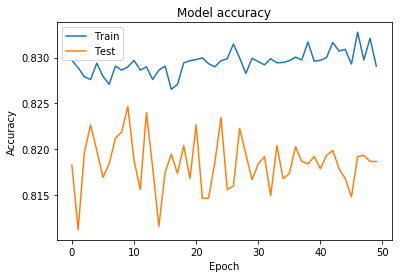

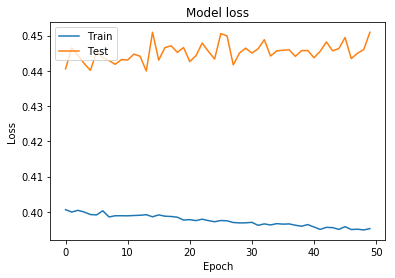

In [51]:
import matplotlib.pyplot as plt

history = model.fit(predictors, target, validation_split=0.25, epochs=50, batch_size=16, verbose=1)

# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()